In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

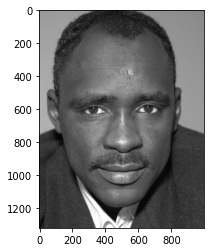

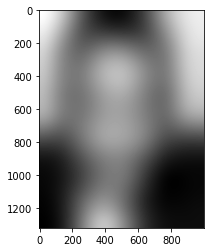

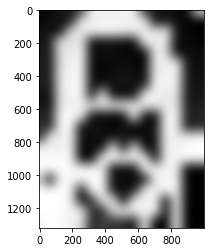

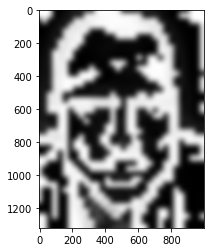

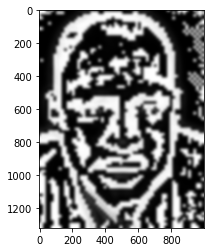

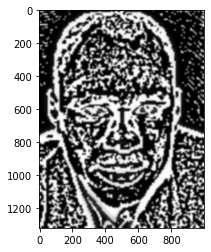

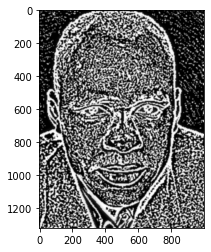

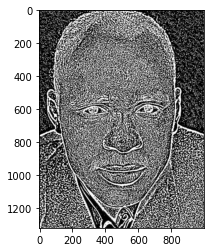

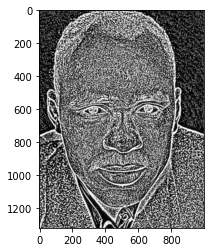

In [2]:
img = cv2.imread("../data/inputs/a4684-_DGW0286.png",0)
plt.imshow(img,cmap='gray')
plt.show()
init = np.array(img)
gpyr = []
lpyr = []
gpyr.append(init)
for i in range(7):
    if(i==0):
        down = cv2.pyrDown(init)
    else:
        down = cv2.pyrDown(down)
    gpyr.append(down)
ltop = gpyr[len(gpyr)-1]
lpyr.append(ltop)
for i in range(1,len(gpyr)):
    size = (gpyr[len(gpyr)-i-1].shape[1], gpyr[len(gpyr)-i-1].shape[0])
    gup = cv2.pyrUp(gpyr[len(gpyr)-i], dstsize=size)
    laplacian = gpyr[len(gpyr)-i-1] - gup
    lpyr.append(laplacian)
for i in range(len(lpyr)-1):
    for j in range(len(lpyr)-i-1):
        size = (lpyr[i+j+1].shape[1], lpyr[i+j+1].shape[0])
        lpyr[i] = cv2.pyrUp(lpyr[i],dstsize=size)/4
    if(i==0):
        #lpyr[i] = img - lpyr[i]
        x = lpyr[i]
    else:
        x = x + lpyr[i]
    plt.imshow(lpyr[i],cmap='gray')
    plt.show()
plt.imshow(x,cmap='gray')
plt.show()